In [1]:
#tensorFlow para entrenar la red
import tensorflow as tf

# numpy :D
import numpy as np

# Imagenes
import skimage as ski
from skimage import data, io, filters
from skimage.transform import resize
from PIL import Image


# Graficado
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Lectura de archivos  
import os
import csv

#libreria números pseudo random
import random

#para plotear
import math
from scipy.fftpack import fft, ifft
from scipy import ndimage, misc
import scipy.misc

#importar sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle

import cv2 as cv
import sys
import matplotlib.pyplot as plt
%matplotlib inline
print("OpenCV version:")
print(cv.__version__)

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

OpenCV version:
3.4.2


In [2]:
def VideoProcessing(numberFrames,frameRange,Folder,VideoNumberI,VideoNumberF,sizey,sizex):
    videos = []
    for x in range(VideoNumberI,VideoNumberF):
        fps,frameCount,duration = frames(Folder + str(x+1) +'.mov')
        cap = cv.VideoCapture(Folder + str(x+1) +'.mov')
        fullVideo = saveVideo(frameCount,cap,sizey,sizex)
        print(len(fullVideo))
        frameRangeCounter = 0
        contadorGlobal = 0
        contador = 0
        initFrame = 0
        video = []
        #print('llegue a la separacion de los filtros')
        while(contadorGlobal < int(frameCount/(frameRange*framesSpace))):
            #initFrame = random.randint(1, frameRange)
            contador = 0
            videoTemporal = []
            for frame in fullVideo:
                if(contador >= initFrame and contador < initFrame + numberFrames):
                    videoTemporal.append(frame[0])
                    videoTemporal.append(frame[1])
                    videoTemporal.append(frame[2])
                    videoTemporal.append(frame[3])
                    videoTemporal.append(frame[4])
                    videoTemporal.append(frame[5])
                    videoTemporal.append(frame[6])
                    #videoTemporal.append(frame[7])
                    #videoTemporal.append(frame[8])
                    #videoTemporal.append(frame[9])
                    contador = contador + 1
                        
                else:
                    contador = contador + 1
            
            if(len(videoTemporal) == frameRange*filtros):
                video.append(videoTemporal)
            initFrame = initFrame + frameRange
            print("videoTemporal de frames ",initFrame, 'tamano  ', len(videoTemporal))
            #print("videoTemporal de frames ",initFrame, 'tamano  ', len(videoTemporal))
            contadorGlobal = contadorGlobal + 1  
        if(len(video) != 0 ):
            videos.append(video)
        print('video   ', x)
            
    return videos

In [3]:
a = [[None,1],None,1,2]
b = None

In [4]:
print(a)

[[None, 1], None, 1, 2]


In [5]:
if(a):
    print('pene')

pene


In [6]:
def saveVideo(frameCount,cap,y,x):
    contador = 0
    fullVideo = []
    #guardamos todo el video en un vector de frames
    while(contador < frameCount):
        Video = [] 
        ret, frame2 = cap.read()
        if (frame2 is not None):
            #print(contador)
            #if(contador >= 1100):
            #    print(frame2)
            #    print(noSirve1)
            #    print(noSirve2)
            #if(contador > 742 and contador < 746):
            #    plt.imshow(frame2, interpolation='none', cmap='gray')
            #    plt.xticks([]), plt.yticks([])
            #    plt.show()
            #b,g,r = cv.split(frame2)
            gray = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
            face = face_cascade.detectMultiScale(gray, 1.05, 3)
            if(len(face) == 1):
                if(x != 0 and y != 0):
                    #print(face[0][0],face[0][1],face[0][2],face[0][3])
                    gray = redimensionar(gray,y,x,face)
                    pic1 = gray
                    #r = redimensionar(r,y,x)
                    #g = redimensionar(g,y,x)
                    #b = redimensionar(b,y,x)
                laplacian = cv.Laplacian(gray,cv.CV_8U)
                sobelx = cv.Sobel(gray,cv.CV_16S,1,0,ksize=5)
                sobely = cv.Sobel(gray,cv.CV_16S,0,1,ksize=5)
                kirs = kirsch_filter(gray)
                #Video.append(r)
                #Video.append(g)
                #Video.append(b)
                Video.append(gray)
                Video.append(sobelx)
                Video.append(sobely)
                Video.append(laplacian)
                Video.append(kirs)
                if(contador > 0):
                    #OPTx, OPTy = calculate_flow(pic1, gray)
                    #Video.append(OPTx)
                    #Video.append(OPTy)
                    fullVideo.append(Video)
                    ret2, noSirve2 = cap.read()
                    ret3, noSirve3 = cap.read()
                    #ret4, noSirve4 = cap.read()
                    contador = contador + framesSpace - 1
        contador = contador + 1
    cap.release()
    return fullVideo 

In [7]:
def saveVideo(frameCount,cap,y,x):
    contador = 0
    fullVideo = []
    face2 = [0,1]
    #guardamos todo el video en un vector de frames
    while(contador < frameCount):
        Video = [] 
        ret, frame2 = cap.read()
        if (frame2 is not None):
            #print(contador)
            #if(contador >= 1100):
            #    print(frame2)
            #    print(noSirve1)
            #    print(noSirve2)
            #if(contador > 742 and contador < 746):
            #    plt.imshow(frame2, interpolation='none', cmap='gray')
            #    plt.xticks([]), plt.yticks([])
            #    plt.show()
            #b,g,r = cv.split(frame2)
            gray = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
            face = face_cascade.detectMultiScale(gray, 1.05, 3)
            if(len(face) == 1 or len(face2)==1):
                if(len(face) != 1):
                    face = face2
                #print(face[0][0],face[0][1],face[0][2],face[0][3])
                gray2 = redimensionar(gray,y,x,face)
                #r = redimensionar(r,y,x)
                #g = redimensionar(g,y,x)
                #b = redimensionar(b,y,x)
                laplacian = cv.Laplacian(gray,cv.CV_8U)
                laplacian = redimensionar(laplacian,y,x,face)
                sobelx = cv.Sobel(gray,cv.CV_16S,1,0,ksize=5)
                sobelx = redimensionar(sobelx,y,x,face)
                sobely = cv.Sobel(gray,cv.CV_16S,0,1,ksize=5)
                sobely = redimensionar(sobely,y,x,face)
                kirs = kirsch_filter(gray)
                kirs = redimensionar(kirs,y,x,face)
                #Video.append(r)
                #Video.append(g)
                #Video.append(b)
                Video.append(gray2)
                Video.append(sobelx)
                Video.append(sobely)
                Video.append(laplacian)
                Video.append(kirs)
                if(contador > 0):
                    OPTx, OPTy = calculate_flow(pic1, gray)
                    OPTx = redimensionar(OPTx,y,x,face)
                    OPTy = redimensionar(OPTy,y,x,face)
                    Video.append(OPTx)
                    Video.append(OPTy)
                    fullVideo.append(Video)
                    temporalContador = framesSpace
                    while(temporalContador > 0):
                        ret2, noSirve1 = cap.read()
                        temporalContador = temporalContador - 1
            pic1 = gray
        contador = contador + 1
        face2 = face
    cap.release()
    return fullVideo 

In [8]:
def redimensionar(frame,y,x,face):
    frame=ski.util.img_as_ubyte(frame) #ni golfita idea, ya se!! convierte las imagenes a cosas menos pesadas
    #len(frame[0])
    #len(frame)
    #crop_img = frame[20:len(frame)-50, 110:len(frame[0])-50]
    #print(len(face))
    crop_img = frame[face[0][1]:face[0][1]+int(face[0][3]), face[0][0]:face[0][0]+face[0][2]]
    im = cv.resize(crop_img,(y,x), fx=0.5, fy=0.5, interpolation = cv.INTER_AREA)
    return im

In [9]:
def calculate_flow(frame_a, frame_b):
        flow = cv.calcOpticalFlowFarneback(
            frame_a,
            frame_b,
            None,
            0.5, 3, 15, 3, 5, 1.2, 0
        )

        # Change here
        horz = cv.normalize(flow[..., 0], None, 0, 255, cv.NORM_MINMAX)
        vert = cv.normalize(flow[..., 1], None, 0, 255, cv.NORM_MINMAX)
        horz = horz.astype('uint8')
        vert = vert.astype('uint8')

        return horz, vert

In [10]:
import numpy as np
import cv2

def kirsch_filter(gray):
    if gray.ndim > 2:
        raise Exception("illegal argument: input must be a single channel image (gray)")
    kernelG1 = np.array([[ 5,  5,  5],
                         [-3,  0, -3],
                         [-3, -3, -3]], dtype=np.int16)
    kernelG2 = np.array([[ 5,  5, -3],
                         [ 5,  0, -3],
                         [-3, -3, -3]], dtype=np.int16)
    kernelG3 = np.array([[ 5, -3, -3],
                         [ 5,  0, -3],
                         [ 5, -3, -3]], dtype=np.int16)
    kernelG4 = np.array([[-3, -3, -3],
                         [ 5,  0, -3],
                         [ 5,  5, -3]], dtype=np.int16)
    kernelG5 = np.array([[-3, -3, -3],
                         [-3,  0, -3],
                         [ 5,  5,  5]], dtype=np.int16)
    kernelG6 = np.array([[-3, -3, -3],
                         [-3,  0,  5],
                         [-3,  5,  5]], dtype=np.int16)
    kernelG7 = np.array([[-3, -3,  5],
                         [-3,  0,  5],
                         [-3, -3,  5]], dtype=np.int16)
    kernelG8 = np.array([[-3,  5,  5],
                         [-3,  0,  5],
                         [-3, -3, -3]], dtype=np.int16)

    g1 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g2 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG2), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g3 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG3), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g4 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG4), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g5 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG5), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g6 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG6), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g7 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG7), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g8 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG8), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    magn = cv2.max(
        g1, cv2.max(
            g2, cv2.max(
                g3, cv2.max(
                    g4, cv2.max(
                        g5, cv2.max(
                            g6, cv2.max(
                                g7, g8
                            )
                        )
                    )
                )
            )
        )
    )
    return magn

In [11]:
def frames(video):
    cap = cv.VideoCapture(video)
    fps = cap.get(cv.CAP_PROP_FPS)      # OpenCV2 version 2 used "CV_CAP_PROP_FPS"
    frameCount = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
    duration = frameCount/fps

    print('fps = ' + str(fps))
    print('number of frames = ' + str(frameCount))
    print('duration (S) = ' + str(duration))
    minutes = int(duration/60)
    seconds = duration%60
    print('duration (M:S) = ' + str(minutes) + ':' + str(seconds))
    cap.release()
    return fps,frameCount,duration

In [13]:
numberFrames = 100  #18
frameRange = 100  #56
framesSpace = 2
TruthFolder = "videos3/TTesting/"
DeceitFolder = "videos3/FTesting/"
#TruthFolder = "videos2/TValidation/"
#DeceitFolder = "videos2/LValidation/"
TruthVideoNumber = 10
DeceitVideoNumber = 10
filtros = 7

In [ ]:
numberFrames = 100  #18
frameRange = 100  #56
framesSpace = 2
TruthFolder = "videos3/TValidation/"
DeceitFolder = "videos3/LValidation/"
#TruthFolder = "videos2/TValidation/"
#DeceitFolder = "videos2/LValidation/"
TruthVideoNumber = 13
DeceitVideoNumber = 13
filtros = 7

In [ ]:
numberFrames = 100  #18
frameRange = 100  #56
framesSpace = 2
TruthFolder = "videos3/TTesting2/"
DeceitFolder = "videos3/FTesting2/"
#TruthFolder = "videos2/TValidation/"
#DeceitFolder = "videos2/LValidation/"
TruthVideoNumber = 4
DeceitVideoNumber = 4
filtros = 7

# Correr hasta aqui si solamente se va a hacer shuffle, pasar al siguiente comentario 
## PD: no olvides cambiar en numero de frames que se van a procesar

In [14]:
VideoNumberI = 0
VideoNumberF = TruthVideoNumber
videosTruth = VideoProcessing(numberFrames,frameRange,TruthFolder,VideoNumberI,VideoNumberF,50,50)

fps = 29.96969928449571
number of frames = 1177
duration (S) = 39.272999999999996
duration (M:S) = 0:39.272999999999996


/Users/jama/opt/anaconda3/envs/TensorFlow/lib/python3.7/site-packages/skimage/util/dtype.py:131: UserWarning: Possible sign loss when converting negative image of type int16 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/Users/jama/opt/anaconda3/envs/TensorFlow/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from int16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


388
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   616
videoTemporal de frames  500 tamano   0
video    0
fps = 29.97002997002997
number of frames = 1018
duration (S) = 33.96726666666667
duration (M:S) = 0:33.96726666666667
339
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   273
videoTemporal de frames  500 tamano   0
video    1
fps = 29.97002997002997
number of frames = 1210
duration (S) = 40.373666666666665
duration (M:S) = 0:40.373666666666665
403
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   700
videoTemporal de frames  500 tamano   21
videoTemporal de frames  600 tamano   0
video    2
fps = 29.97002997002997
number of frames = 1173
dura

In [15]:
len(videosTruth[0])
suma = 0
for x in range(len(videosTruth)):
    #print(len(videosTruth[x]))
    suma = suma + len(videosTruth[x])
print(len(videosTruth))
print(suma)
    

10
35


0


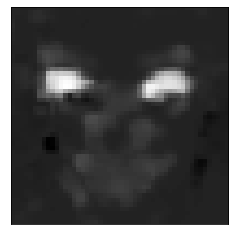

1


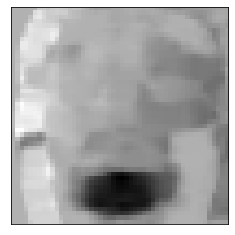

2


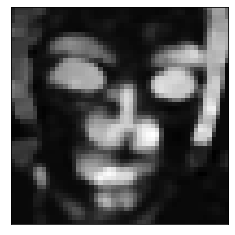

3


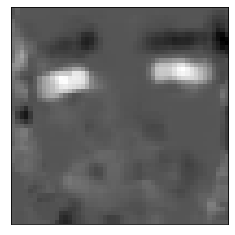

4


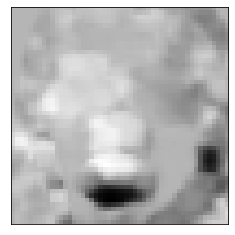

5


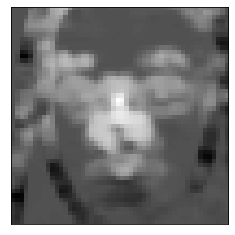

6


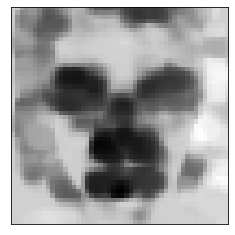

7


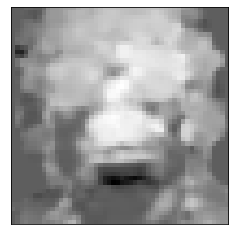

8


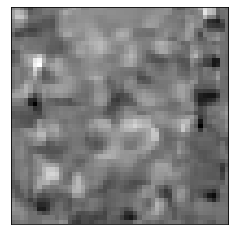

9


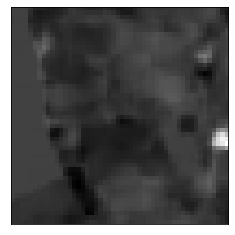

10

In [43]:
for x in range(len(videosTruth)):
    print(x)
    plt.imshow(videosTruth[x][2][6], interpolation='none', cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()
len(videosTruth)

In [16]:
#TruthRF = []
#TruthGF = []
#TruthBF = []
TruthGSF = []
TruthSXF = []
TruthSYF = []
TruthLAPF = []
TruthKIRF = []
TruthOXF = []
TruthOYF = []
yTruthF = []
for y in videosTruth:
    print(len(y[0]))
    #TruthR = []
    #TruthG = []
    #TruthB = []
    TruthGS = []
    TruthSX = []
    TruthSY = []
    TruthLAP = []
    TruthKIR = []
    TruthOX = []
    TruthOY = []
    yTruth = []
    contadorr = 0
    if(len(y)!=0):
        for x in y:
            #temporalR = []
            #temporalG = []
            #temporalB = []
            temporalGS = []
            temporalSX = []
            temporalSY = []
            temporalLAP = []
            temporalKIR = []
            temporalOX = []
            temporalOY = []
            if(len(x)==numberFrames*filtros):
                contador = 0
                for y in range(numberFrames):
                    temporalGS.append(x[contador])
                    contador = contador + filtros

                contador = 1
                for y in range(numberFrames):
                    temporalSX.append(x[contador])
                    contador = contador + filtros

                contador = 2
                for y in range(numberFrames):
                    temporalSY.append(x[contador])
                    contador = contador + filtros

                contador = 3
                for y in range(numberFrames):
                    temporalLAP.append(x[contador])
                    contador = contador + filtros

                contador = 4
                for y in range(numberFrames):
                    temporalKIR.append(x[contador])
                    contador = contador + filtros

                contador = 5
                for y in range(numberFrames):
                    temporalOX.append(x[contador])
                    contador = contador + filtros

                contador = 6
                for y in range(numberFrames):
                    temporalOY.append(x[contador])
                    contador = contador + filtros

                #TruthR.append(temporalR)
                #TruthG.append(temporalG)
                #TruthB.append(temporalB)
                TruthGS.append(temporalGS)
                TruthSX.append(temporalSX)
                TruthSY.append(temporalSY)
                TruthLAP.append(temporalLAP)
                TruthKIR.append(temporalKIR)
                TruthOX.append(temporalOX)
                TruthOY.append(temporalOY)
                yTruth.append([0,1])
                contadorr += 1
            else:
                print("contador ",contadorr, "len ",len(x))
                contadorr += 1
        #TruthRF.append(TruthR)
        #TruthGF.append(TruthG)
        #TruthBF.append(TruthB)
        TruthGSF.append(TruthGS)
        TruthSXF.append(TruthSX)
        TruthSYF.append(TruthSY)
        TruthLAPF.append(TruthLAP)
        TruthKIRF.append(TruthKIR)
        TruthOXF.append(TruthOX)
        TruthOYF.append(TruthOY)
        yTruthF.append(yTruth)

700
700
700
700
700
700
700
700
700
700


In [17]:
print("TruthGS ",len(TruthGSF),"  TruthSX  ",len(TruthSXF),"TruthSY  ",len(TruthSYF),
      "TruthLAP ",len(TruthLAPF),"  TruthKIR  ",len(TruthKIRF),"  yTruth  ",len(yTruthF))
suma = 0
for x in range(len(TruthGSF)):
    #print(len(videosTruth[x]))
    suma = suma + len(TruthGSF[x])
print(suma)
#print(TruthGSF)

TruthGS  10   TruthSX   10 TruthSY   10 TruthLAP  10   TruthKIR   10   yTruth   10
35


In [18]:
VideoNumberI = 0
VideoNumberF = DeceitVideoNumber
videosDeceit = VideoProcessing(numberFrames,frameRange,DeceitFolder,VideoNumberI,VideoNumberF,50,50)

fps = 29.969333705046
number of frames = 1075
duration (S) = 35.87
duration (M:S) = 0:35.87
246
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   322
videoTemporal de frames  400 tamano   0
videoTemporal de frames  500 tamano   0
video    0
fps = 29.97002997002997
number of frames = 1160
duration (S) = 38.705333333333336
duration (M:S) = 0:38.705333333333336
387
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   609
videoTemporal de frames  500 tamano   0
video    1
fps = 29.97002997002997
number of frames = 1255
duration (S) = 41.875166666666665
duration (M:S) = 0:41.875166666666665
418
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   700
videoTemporal de frames  500 tamano   126
videoTempo

In [62]:
len(videosDeceit[1])

3

0


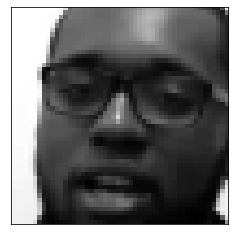

1


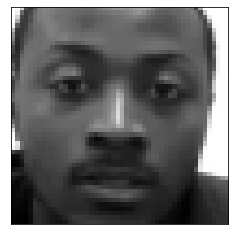

2


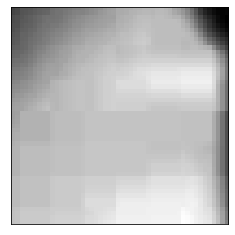

3


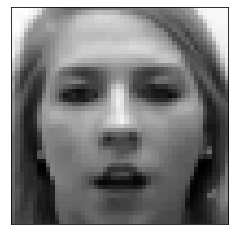

4


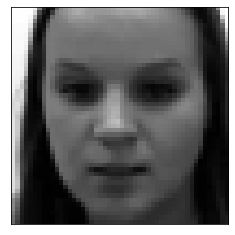

5


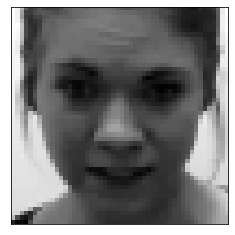

6


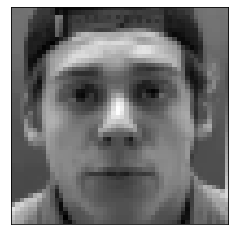

7


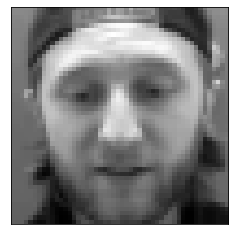

8


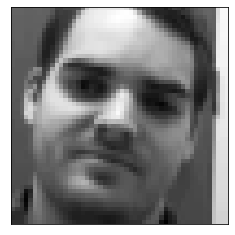

9


IndexError: list index out of range

In [37]:
for x in range(len(videosDeceit)):
    print(x)
    plt.imshow(videosDeceit[x+1][2][0], interpolation='none', cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

In [64]:
len(videosDeceit[0])
suma = 0
for x in range(len(videosDeceit)):
    #print(len(videosTruth[x]))
    suma = suma + len(videosDeceit[x])
print(len(videosDeceit))
print(suma)

2
6


In [19]:
#DeceitRF = []
#DeceitGF = []
#DeceitBF = []
DeceitGSF = []
DeceitSXF = []
DeceitSYF = []
DeceitLAPF = []
DeceitKIRF = []
DeceitOXF = []
DeceitOYF = []
yDeceitF = []
for y in videosDeceit:
    print(len(y[0]))
    #DeceitR = []
    #DeceitG = []
    #DeceitB = []
    DeceitGS = []
    DeceitSX = []
    DeceitSY = []
    DeceitLAP = []
    DeceitKIR = []
    DeceitOX = []
    DeceitOY = []
    yDeceit = []
    contadorr = 0
    if (len(y) != 0):
        for x in y:
            #temporalR = []
            #temporalG = []
            #temporalB = []
            temporalGS = []
            temporalSX = []
            temporalSY = []
            temporalLAP = []
            temporalKIR = []
            temporalOX = []
            temporalOY = []
            if(len(x)==numberFrames*filtros):
                contador = 0
                for y in range(numberFrames):
                    temporalGS.append(x[contador])
                    contador = contador + filtros

                contador = 1
                for y in range(numberFrames):
                    temporalSX.append(x[contador])
                    contador = contador + filtros

                contador = 2
                for y in range(numberFrames):
                    temporalSY.append(x[contador])
                    contador = contador + filtros

                contador = 3
                for y in range(numberFrames):
                    temporalLAP.append(x[contador])
                    contador = contador + filtros

                contador = 4
                for y in range(numberFrames):
                    temporalKIR.append(x[contador])
                    contador = contador + filtros

                contador = 5
                for y in range(numberFrames):
                    temporalOX.append(x[contador])
                    contador = contador + filtros

                contador = 6
                for y in range(numberFrames):
                    temporalOY.append(x[contador])
                    contador = contador + filtros



                #DeceitR.append(temporalR)
                #DeceitG.append(temporalG)
                #DeceitB.append(temporalB)
                DeceitGS.append(temporalGS)
                DeceitSX.append(temporalSX)
                DeceitSY.append(temporalSY)
                DeceitLAP.append(temporalLAP)
                DeceitKIR.append(temporalKIR)
                DeceitOX.append(temporalOX)
                DeceitOY.append(temporalOY)
                yDeceit.append([1,0])
                contadorr += 1
            else:
                print(contadorr,len(x))
                contadorr += 1
        #DeceitRF.append(DeceitR)
        #DeceitGF.append(DeceitG)
        #DeceitBF.append(DeceitB)
        DeceitGSF.append(DeceitGS)
        DeceitSXF.append(DeceitSX)
        DeceitSYF.append(DeceitSY)
        DeceitLAPF.append(DeceitLAP)
        DeceitKIRF.append(DeceitKIR)
        DeceitOXF.append(DeceitOX)
        DeceitOYF.append(DeceitOY)
        yDeceitF.append(yDeceit)

700
700
700
700
700
700
700
700
700
700


In [20]:
print("TruthGS ",len(TruthGSF),"  TruthSX  ",len(TruthSXF),"TruthSY  ",len(TruthSYF),
      "TruthLAP ",len(TruthLAPF),"  TruthKIR  ",len(TruthKIRF),"  yTruth  ",len(yTruthF))
suma = 0
for x in range(len(TruthGSF)):
    #print(len(videosTruth[x]))
    suma = suma + len(TruthGSF[x])
print(suma)

TruthGS  10   TruthSX   10 TruthSY   10 TruthLAP  10   TruthKIR   10   yTruth   10
35


In [21]:
print("DeceitGS ",len(DeceitGSF),"  DeceitSX  ",len(DeceitSXF),"DeceitSY  ",len(DeceitSYF),
      "DeceitLAP ",len(DeceitLAPF),"  DeceitKIR  ",len(DeceitKIRF),"  yDeceit  ",len(yDeceitF))
suma = 0
for x in range(len(DeceitGSF)):
    #print(len(videosTruth[x]))
    suma = suma + len(DeceitGSF[x])
print(suma)

DeceitGS  10   DeceitSX   10 DeceitSY   10 DeceitLAP  10   DeceitKIR   10   yDeceit   10
31


In [22]:
TruthGSF = np.array(TruthGSF)
DeceitGSF = np.array(DeceitGSF)
TruthSXF = np.array(TruthSXF)
DeceitSXF = np.array(DeceitSXF)
TruthSYF = np.array(TruthSYF)
DeceitSYF = np.array(DeceitSYF)
TruthLAPF = np.array(TruthLAPF)
DeceitLAPF = np.array(DeceitLAPF)
TruthKIRF = np.array(TruthKIRF)
DeceitKIRF = np.array(DeceitKIRF)
TruthOXF = np.array(TruthOXF)
DeceitOXF = np.array(DeceitOXF)
TruthOYF = np.array(TruthOYF)
DeceitOYF = np.array(DeceitOYF)
yTruthF = np.array(yTruthF)
yDeceitF = np.array(yDeceitF)

In [69]:
#DataRTrain = np.concatenate((TruthR , DeceitR),axis=0)
#DataGTrain =  np.concatenate((TruthG , DeceitG),axis=0)
#DataBTrain = np.concatenate((TruthB , DeceitB),axis=0)

In [23]:
DataGSTrain = np.concatenate((TruthGSF , DeceitGSF),axis=0)
DataSXTrain =  np.concatenate((TruthSXF , DeceitSXF),axis=0)
DataSYTrain = np.concatenate((TruthSYF , DeceitSYF),axis=0)

In [24]:
DataLAPTrain = np.concatenate((TruthLAPF , DeceitLAPF),axis=0)
DataKIRTrain = np.concatenate((TruthKIRF , DeceitKIRF),axis=0)

In [25]:
DataOXTrain = np.concatenate((TruthOXF , DeceitOXF),axis=0)
DataOYTrain = np.concatenate((TruthOYF , DeceitOYF),axis=0)

In [26]:
DatayTrain = np.concatenate((yTruthF , yDeceitF),axis=0)

In [95]:
print("DataGSTrain ",len(DataGSTrain),"  DatayTrain  ",len(DatayTrain))

DataGSTrain  40   DatayTrain   40


In [96]:
len(DataGSTrain)

40

In [97]:
len(DataGSTrain[3])

3

In [98]:
len(DataGSTrain[1][0])

100

In [99]:
len(DataGSTrain[1][0][0])

50

In [100]:
len(DataGSTrain[1][0][0][0])

50

0
[0, 1]


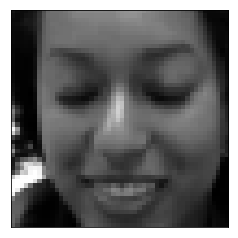

1
[0, 1]


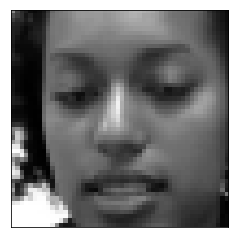

2
[0, 1]


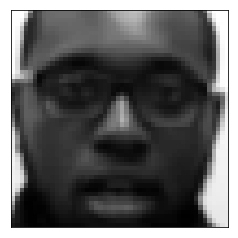

3
[0, 1]


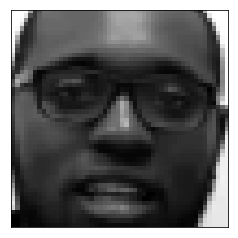

4
[0, 1]


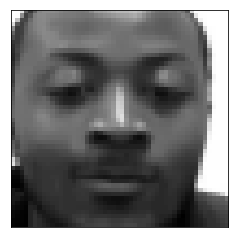

5
[0, 1]


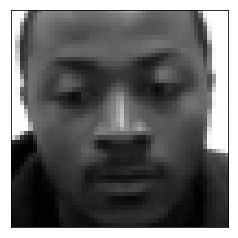

6
[0, 1]


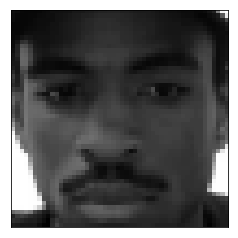

7
[0, 1]


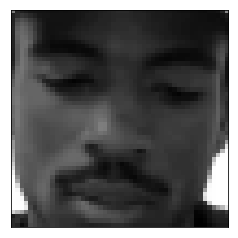

8
[0, 1]


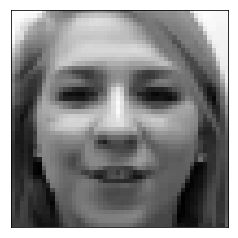

9
[0, 1]


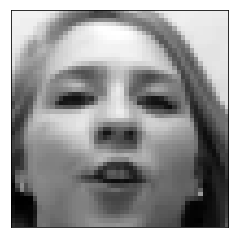

10
[0, 1]


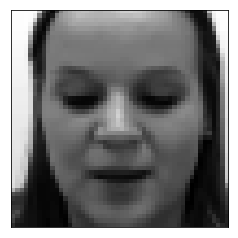

11
[0, 1]


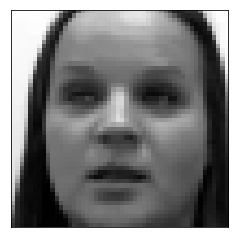

12
[0, 1]


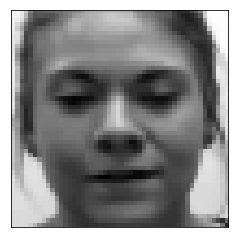

13
[0, 1]


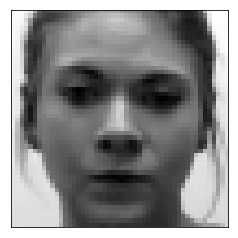

14
[0, 1]


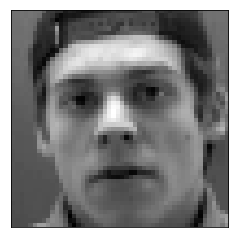

15
[0, 1]


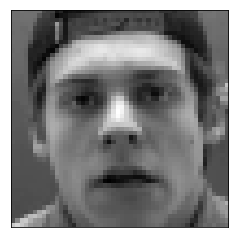

16
[0, 1]


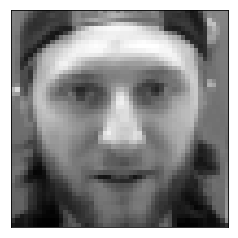

17
[0, 1]


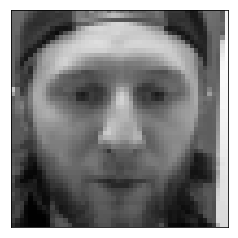

18
[0, 1]


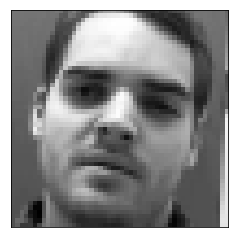

19
[0, 1]


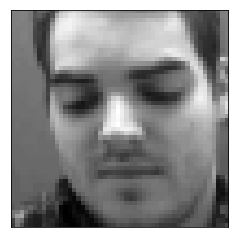

20
[1, 0]


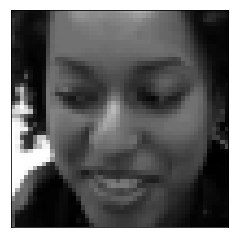

21
[1, 0]


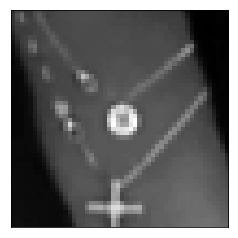

22
[1, 0]


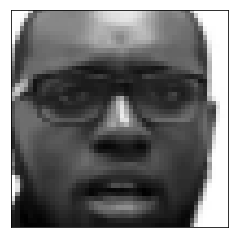

23
[1, 0]


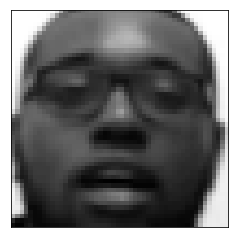

24
[1, 0]


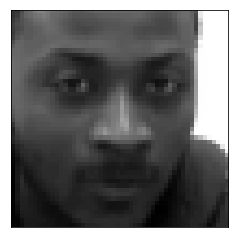

25
[1, 0]


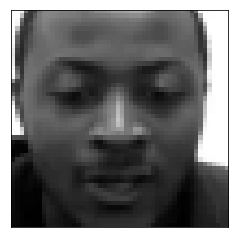

26
[1, 0]


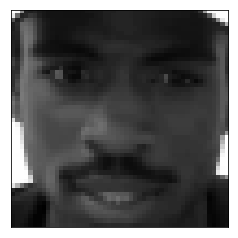

27
[1, 0]


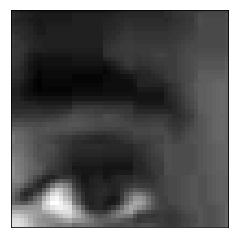

28
[1, 0]


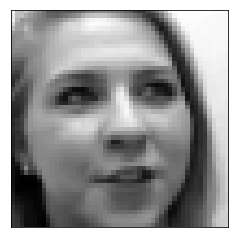

29
[1, 0]


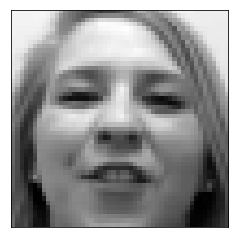

30
[1, 0]


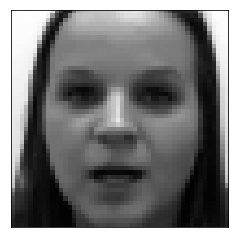

31
[1, 0]


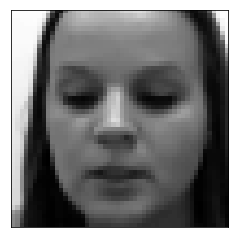

32
[1, 0]


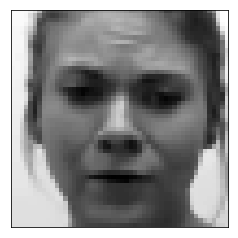

33
[1, 0]


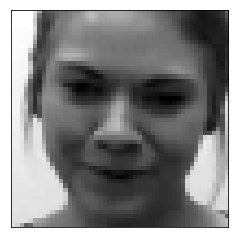

34
[1, 0]


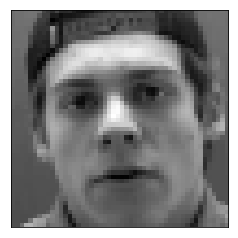

35
[1, 0]


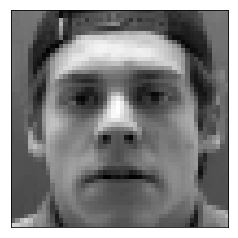

36
[1, 0]


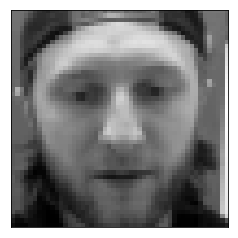

37
[1, 0]


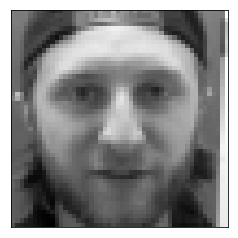

38
[1, 0]


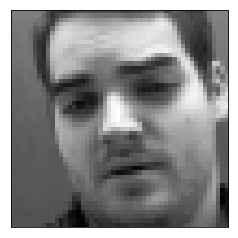

39
[1, 0]


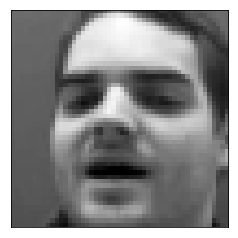

In [101]:
for x in range(0,len(DataGSTrain)):
    print(x)
    print(DatayTrain[x][0])
    plt.imshow(DataGSTrain[x][0][0], interpolation='none', cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

In [102]:
#np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/TestR'+str(numberFrames)+'.npy',np.array(DataRTrain))
#np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/TestG'+str(numberFrames)+'.npy',np.array(DataGTrain))
#np.save('Data'+str(numberFrames)+'FramesPorVideo/Shuffle/TestB'+str(numberFrames)+'.npy',np.array(DataBTrain))


In [27]:
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TestGS'+str(numberFrames)+'.npy',np.array(DataGSTrain))
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TestSX'+str(numberFrames)+'.npy',np.array(DataSXTrain))
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TestSY'+str(numberFrames)+'.npy',np.array(DataSYTrain))

In [28]:
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TestLAP'+str(numberFrames)+'.npy',np.array(DataLAPTrain))
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TestKIR'+str(numberFrames)+'.npy',np.array(DataKIRTrain))

In [29]:
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TestOX'+str(numberFrames)+'.npy',np.array(DataOXTrain))
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TestOY'+str(numberFrames)+'.npy',np.array(DataOYTrain))

In [30]:
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TestY'+str(numberFrames)+'.npy',np.array(DatayTrain))

In [ ]:
####################

In [ ]:
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/ValidationGS'+str(numberFrames)+'.npy',np.array(DataGSTrain))
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/ValidationSX'+str(numberFrames)+'.npy',np.array(DataSXTrain))
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/ValidationSY'+str(numberFrames)+'.npy',np.array(DataSYTrain))

In [ ]:
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/ValidationLAP'+str(numberFrames)+'.npy',np.array(DataLAPTrain))
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/ValidationKIR'+str(numberFrames)+'.npy',np.array(DataKIRTrain))

In [ ]:
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/ValidationOX'+str(numberFrames)+'.npy',np.array(DataOXTrain))
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/ValidationOY'+str(numberFrames)+'.npy',np.array(DataOYTrain))

In [ ]:
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/ValidationY'+str(numberFrames)+'.npy',np.array(DatayTrain))

In [ ]:
################

In [ ]:
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TestGS2'+str(numberFrames)+'.npy',np.array(DataGSTrain))
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TestSX2'+str(numberFrames)+'.npy',np.array(DataSXTrain))
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TestSY2'+str(numberFrames)+'.npy',np.array(DataSYTrain))

In [ ]:
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TestLAP2'+str(numberFrames)+'.npy',np.array(DataLAPTrain))
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TestKIR2'+str(numberFrames)+'.npy',np.array(DataKIRTrain))

In [ ]:
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TestOX2'+str(numberFrames)+'.npy',np.array(DataOXTrain))
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TestOY2'+str(numberFrames)+'.npy',np.array(DataOYTrain))

In [ ]:
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TestY2'+str(numberFrames)+'.npy',np.array(DatayTrain))